In [8]:
from tensorflow.keras.datasets import mnist
import os
from keras import models
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam


from tensorflow.keras import backend as K
import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist, fashion_mnist,cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [9]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

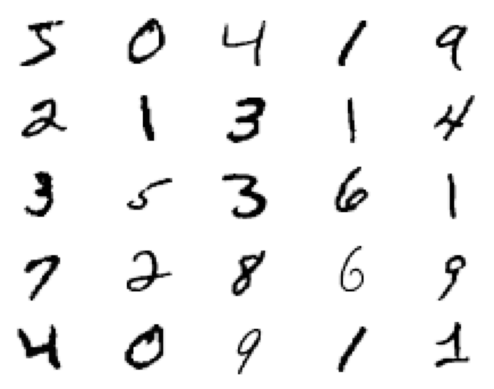

In [10]:
from matplotlib import pyplot as plt

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [11]:
type(train_images)

numpy.ndarray

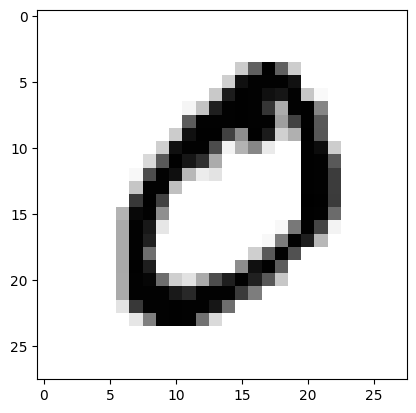

In [12]:
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
plt.show()

In [13]:

train_images_ = train_images.reshape((60000,28,28,1))
train_images_ = train_images.astype('float32')/255

test_images_ = test_images.reshape((10000,28,28,1))
test_images_ = test_images.astype('float32')/255

from keras.utils import to_categorical

train_labels_ = to_categorical(train_labels)
test_labels_ = to_categorical(test_labels)

In [14]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
print('Xtrain shape:', train_images_.shape)
print(train_images_.shape[0], 'train samples')
print(test_images_.shape[0], 'test samples')
print(train_images_[0].shape, 'image shape')
print('ytrain shape:', train_labels_.shape)
print('ytest shape:', test_labels_.shape)

Xtrain shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape
ytrain shape: (60000, 10)
ytest shape: (10000, 10)


In [31]:
#train_images = train_images.reshape((60000, 28*28))
#train_images = train_images.astype("float32")/255


In [32]:
#test_images = test_images.reshape((10000,28*28))
#test_images = test_images.astype("float32")/255

In [16]:
K.clear_session()
model = Sequential([
    
    ### Convolutional layers
    Conv2D(filters = 32, kernel_size = (3,3), 
           strides = (1,1),  
           activation = 'relu' , input_shape = (28,28,1), # use relu
           kernel_initializer=tk.initializers.GlorotNormal(seed=34)),  # how to initialise the model parameters
           
    
    MaxPooling2D((2,2)),
    
    Conv2D(filters = 64, kernel_size = (3,3), 
           activation = 'relu') ,  # use relu
            
    
    MaxPooling2D((2,2)),
    
    ### Fully connected layers for classification
    Conv2D(filters = 64, kernel_size = (3,3), 
           activation = 'relu') ,  # use relu
            
    Flatten(),
    
    Dense(units=64, activation= 'relu'),  # use relu

    
    # Output layer
    # think of how many categories we have to predict 
    Dense(units= 10, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [18]:
# Compile 
model.compile(optimizer='rmsprop', # Adam()
              loss='categorical_crossentropy' , # multiclass: 'categorical_crossentropy' 
              metrics=['accuracy'])

In [19]:
model.fit(train_images_,
         train_labels_,
         epochs = 10,
         batch_size = 64, 
         validation_split = 0.2)


Epoch 1/10
750/750 [==============================] - 13s 16ms/step - loss: 0.2109 - accuracy: 0.9329 - val_loss: 0.0850 - val_accuracy: 0.9727
Epoch 2/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0573 - accuracy: 0.9825 - val_loss: 0.0640 - val_accuracy: 0.9826
Epoch 3/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.0550 - val_accuracy: 0.9847
Epoch 4/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0501 - val_accuracy: 0.9853
Epoch 5/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0390 - val_accuracy: 0.9898
Epoch 6/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0390 - val_accuracy: 0.9899
Epoch 7/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0145 - accuracy: 0.9957 - val_loss: 0.0451 - val_accuracy:

In [20]:
test_loss, test_acc = model.evaluate(test_images_, test_labels_)
print("test_loss : ", test_loss,"\ntest_acc : ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0383 - accuracy: 0.9917
test_loss :  0.038289040327072144 
test_acc :  0.9916999936103821


In [21]:
from tensorflow.keras.models import load_model
model.save("model_numbers_99.h5")

In [ ]:

classes = [...]
base_path = '...'

for i, target in enumerate(classes):
      files = os.listdir(base_path + target)
      for file in files:
         # load the image
         img = ...
         # convert it to an array
         img_array = ...
         # append the array to X
         ...
         # append the numeric target to y
         ...

X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]